In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re #regular expression
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
consumerKey = 'FIKIk9765mOgxYV86tBhRviu1'
consumerSecret = 'gVSiUWUOVCyCm5HBu0YY1Q7vr7Us8mRgeBh5ixZ3kB1TqkCtVG'
accessToken = '1395621591468306433-yB2Xj0dUtCl60iYDspEjq2eBuGubwW'
accessSecret = 'ssfp9kpkDkxNlyHjlVZL0uSIqxVrJ1hKnURwbKyOBpUEu'

In [ ]:
#Creating Authenication Object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#set the acess token and access token secret
authenticate.set_access_token(accessToken, accessSecret)

#create the API object passing the auth information
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [ ]:
#Extract 100 tweets from the tweeter user
posts = api.user_timeline(screen_name = 'BillGates', count = 100, lang = 'en', tweet_mode='extended')

#print last five tweets from the account
print("Show the 5 recent tweets:\n")
i=1
for tweets in posts[0:5]:
  print(str(i)+')'+tweets.full_text + '\n')
  i+=1

Show the 5 recent tweets:

1)Math shouldn’t be a gatekeeper, limiting a student’s dreams. It should be a gateway, helping students realize them. https://t.co/YjFMqGn5yz

2)TerraPower, the next-gen nuclear company I founded, just agreed with PacifiCorp to study the feasibility of building five Natrium reactors for its customers. https://t.co/S6F0ALOnFO

3)I had a great meeting with @starkwatzinger to discuss the importance of funding research to address some of the future challenges we face in global health. https://t.co/vLDqt4SBpn

4)Thank you, Prime Minister @Xavier_Bettel for your continued commitment and support. https://t.co/AyXnm7ThA6

5)I am thrilled to see the existing partnership between @EIB and @Breakthrough strengthen with the signing of this MOU today. Global collaboration like this has the power to bring the clean energy solutions we need to communities around the world. https://t.co/YIzvV6G7Jg



In [ ]:
#Creating a dataframe
df = pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

#Show the first five rows of data
df.head()

,Tweets
0,"Math shouldn’t be a gatekeeper, limiting a stu..."
1,"TerraPower, the next-gen nuclear company I fou..."
2,I had a great meeting with @starkwatzinger to ...
3,"Thank you, Prime Minister @Xavier_Bettel for y..."
4,I am thrilled to see the existing partnership ...


In [ ]:
df.columns

Index(['Tweets'], dtype='object')

In [ ]:
#Cleaning data

#create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#','',text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'https?:\/\/\S+','',text)

  return(text)

df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Printing clean txt

df

,Tweets
0,"Math shouldn’t be a gatekeeper, limiting a stu..."
1,"TerraPower, the next-gen nuclear company I fou..."
2,I had a great meeting with to discuss the imp...
3,"Thank you, Prime Minister _Bettel for your con..."
4,I am thrilled to see the existing partnership ...
...,...
95,In the past 16 years the world has made immens...
96,"Tony, you were an amazing public servant long ..."
97,"Years ago, the idea of using mosquitoes as an ..."
98,I’m at my happiest when I’m learning – no matt...


In [ ]:
#create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#creat a function to get the polarity
def getPolarity(text):
  return(TextBlob(text).sentiment.polarity)

#create two columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,"Math shouldn’t be a gatekeeper, limiting a stu...",0.000000,0.000000
1,"TerraPower, the next-gen nuclear company I fou...",0.000000,0.000000
2,I had a great meeting with to discuss the imp...,0.291667,0.266667
3,"Thank you, Prime Minister _Bettel for your con...",0.000000,0.000000
4,I am thrilled to see the existing partnership ...,0.466667,0.322222
...,...,...,...
95,In the past 16 years the world has made immens...,0.625000,-0.125000
96,"Tony, you were an amazing public servant long ...",0.455556,0.183333
97,"Years ago, the idea of using mosquitoes as an ...",0.950000,-0.050000
98,I’m at my happiest when I’m learning – no matt...,0.411111,0.211111


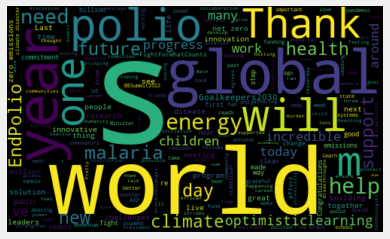

In [ ]:
#Plot Word cloud
allWords = ' '.join([tweets for tweets in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 199).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#create a function to compute the negative neutral and positive analysis

def getAnalysis(score):
  if score < 0:
    return('Negative')
  elif score == 0:
    return('Neutral')
  else :
    return ('Positive')

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show the data frame
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Math shouldn’t be a gatekeeper, limiting a stu...",0.000000,0.000000,Neutral
1,"TerraPower, the next-gen nuclear company I fou...",0.000000,0.000000,Neutral
2,I had a great meeting with to discuss the imp...,0.291667,0.266667,Positive
3,"Thank you, Prime Minister _Bettel for your con...",0.000000,0.000000,Neutral
4,I am thrilled to see the existing partnership ...,0.466667,0.322222,Positive
...,...,...,...,...
95,In the past 16 years the world has made immens...,0.625000,-0.125000,Negative
96,"Tony, you were an amazing public servant long ...",0.455556,0.183333,Positive
97,"Years ago, the idea of using mosquitoes as an ...",0.950000,-0.050000,Negative
98,I’m at my happiest when I’m learning – no matt...,0.411111,0.211111,Positive


In [ ]:
#print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j)+')'+sortedDF['Tweets'][i])
    print()
    j+=1

1)I had a great meeting with  to discuss the importance of funding research to address some of the future challenges we face in global health. 

2)I am thrilled to see the existing partnership between  and  strengthen with the signing of this MOU today. Global collaboration like this has the power to bring the clean energy solutions we need to communities around the world. 

3)Testing for viruses with a breathalyzer? It’s possible. Pretty incredible to see the innovative work happening at _int. 

4)Thank you, Prime Minister , for hosting this year’s GrandChallenges meeting. Your support in facilitating this gathering of global leaders will help ensure a healthier and more secure world. 

5) Thanks for having me! Seeing the universal Al Robotics platform in action was incredible.

6)  Thank you for the thoughtful discussion.

7)One amazing program supported by the EU and  together is the African Medicines Agency, a new African Union institution to strengthen regulatory capacity and heal

In [ ]:
#print negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending='False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j)+')'+sortedDF['Tweets'][i])
    print()
    j+=1

1)  It’s unrealistic to expect people to stop traveling by plane. We must scale innovations that decarbonize the aviation industry.  will help us achieve this by building the world’s first plant for turning alcohol into sustainable aviation fuel. 

2)Last week, I sat down with Bloomberg  to talk about why I remain so committed to eradicating polio. By coming together and funding efforts like the Global Polio Eradication Initiative, we can EndPolio and build a healthier world. 

3)The world can end this pandemic while also preventing the next. As  shares, "such changes seem unrealistic given the relentless disappointments of the past three years, but substantial social progress always seems unfeasible until it is actually achieved." 

4): Amidst backsliding on the SDGs in the past two years, this interview with  is an optimistic reminder that the mo…

5)I feel honored to have met HM Queen Elizabeth, and I am very sad to hear of her passing. My deepest condolences to the Royal Family and

In [ ]:
#printing neutral tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Neutral'):
    print(str(j)+')'+sortedDF['Tweets'][i])
    print()
    j+=1

1)Math shouldn’t be a gatekeeper, limiting a student’s dreams. It should be a gateway, helping students realize them. 

2)TerraPower, the next-gen nuclear company I founded, just agreed with PacifiCorp to study the feasibility of building five Natrium reactors for its customers. 

3)Thank you, Prime Minister _Bettel for your continued commitment and support. 

4)I’m deeply grateful for the efforts of partners like President  who have helped reduce the global polio burden by 99.9% and prevented an estimated 20 million children from being paralyzed. Together, we can overcome the last hurdles and achieve a polio-free world. 

5)Twenty years ago, I thought of GrandChallenges as a Gates Foundation initiative. Because of all of the innovators and broader scientific community involved, it has become a global movement. 

6)To understand what it will take to get to zero, we need to start by asking where the 51 billion tons of emissions come from:  MastersofScaleSummit 

7)The  Energy Summit is 

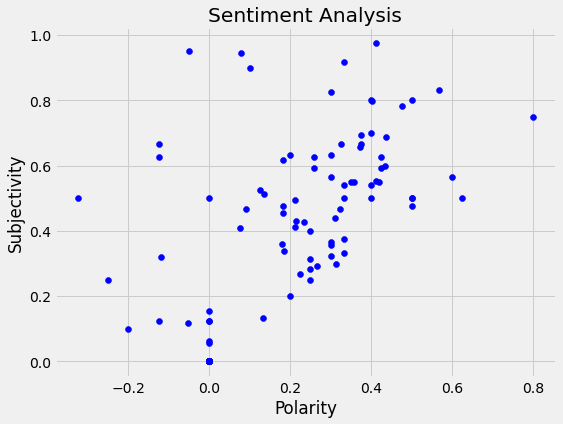

In [ ]:
#plotting the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [ ]:
#Get the percentage of positive Tweets
ptweets=df[df.Analysis=='Positive']
positive_per  = ptweets.shape[0]*100/df.shape[0]
print("Percentage of positive tweets:",positive_per,"%")

Percentage of positive tweets: 67.0 %


In [ ]:
#Get the percentage of Negative Tweets
Ntweets=df[df.Analysis=='Negative']
Negative_per  = Ntweets.shape[0]*100/df.shape[0]
print("Percentage of Negative tweets:",Negative_per,"%")

Percentage of Negative tweets: 9.0 %


Positive    67
Neutral     24
Negative     9
Name: Analysis, dtype: int64


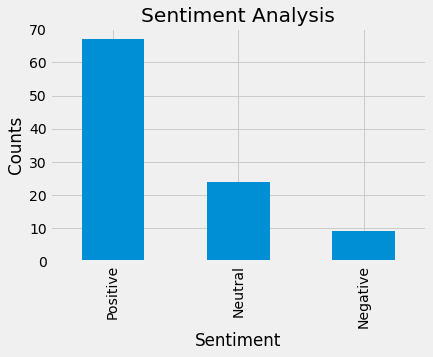

In [ ]:
#shows the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

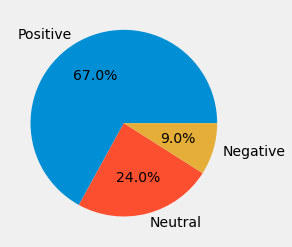

In [ ]:
y = df['Analysis'].value_counts()
labels = ["Positive", "Neutral", "Negative"]
plt.pie(y, labels = labels, autopct='%.1f%%')
plt.show() 